In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# this is needed when importing from the notebooks folder
sys.path.append("../")
from lobster import Lightcurve
from lobster.filtering import sin4_filter

BIC: choosing {'method': 'tips-poly-1', 'min-width': 5, 'max-width': 15, 'max-jump': 10, 'min-jump': 0, 'max-jump-multiplicator': 10, 'constrain-equal-width': False} for jump at t=169.5208 d


/var/home/aunetx/Documents/docs/recherche/work/lobster/notebooks/../lobster/stitching.py:298: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


BIC: choosing {'method': 'tips-poly-1', 'min-width': 5, 'max-width': 15, 'max-jump': 10, 'min-jump': 0, 'max-jump-multiplicator': 10, 'constrain-equal-width': False} for jump at t=260.2251 d
BIC: choosing {'method': 'tips-poly-1', 'min-width': 5, 'max-width': 15, 'max-jump': 10, 'min-jump': 0, 'max-jump-multiplicator': 10, 'constrain-equal-width': False} for jump at t=352.3761 d
BIC: choosing {'method': 'tips-poly-1', 'min-width': 5, 'max-width': 15, 'max-jump': 10, 'min-jump': 0, 'max-jump-multiplicator': 10, 'constrain-equal-width': False} for jump at t=443.4900 d
BIC: choosing {'method': 'tips-poly-1', 'min-width': 5, 'max-width': 15, 'max-jump': 10, 'min-jump': 0, 'max-jump-multiplicator': 10, 'constrain-equal-width': False} for jump at t=539.4711 d
BIC: choosing {'method': 'tips-poly-1', 'min-width': 5, 'max-width': 15, 'max-jump': 10, 'min-jump': 0, 'max-jump-multiplicator': 10, 'constrain-equal-width': False} for jump at t=630.1755 d
BIC: choosing {'method': 'tips-poly-1', 'min-

/var/home/aunetx/Documents/docs/recherche/work/lobster/notebooks/../lobster/stitching.py:63: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10, 6))


BIC: choosing {'method': 'total-mean', 'min-width': 0, 'max-width': inf, 'constrain-equal-width': False, 'min-jump': 0, 'max-jump': inf, 'max-jump-multiplicator': inf} for jump at t=630.1755 d
BIC: choosing {'method': 'total-mean', 'min-width': 0, 'max-width': inf, 'constrain-equal-width': False, 'min-jump': 0, 'max-jump': inf, 'max-jump-multiplicator': inf} for jump at t=735.3627 d
BIC: choosing {'method': 'total-mean', 'min-width': 0, 'max-width': inf, 'constrain-equal-width': False, 'min-jump': 0, 'max-jump': inf, 'max-jump-multiplicator': inf} for jump at t=808.5155 d
BIC: choosing {'method': 'total-mean', 'min-width': 0, 'max-width': inf, 'constrain-equal-width': False, 'min-jump': 0, 'max-jump': inf, 'max-jump-multiplicator': inf} for jump at t=906.8466 d
BIC: choosing {'method': 'total-mean', 'min-width': 0, 'max-width': inf, 'constrain-equal-width': False, 'min-jump': 0, 'max-jump': inf, 'max-jump-multiplicator': inf} for jump at t=1001.2088 d
BIC: choosing {'method': 'total-me

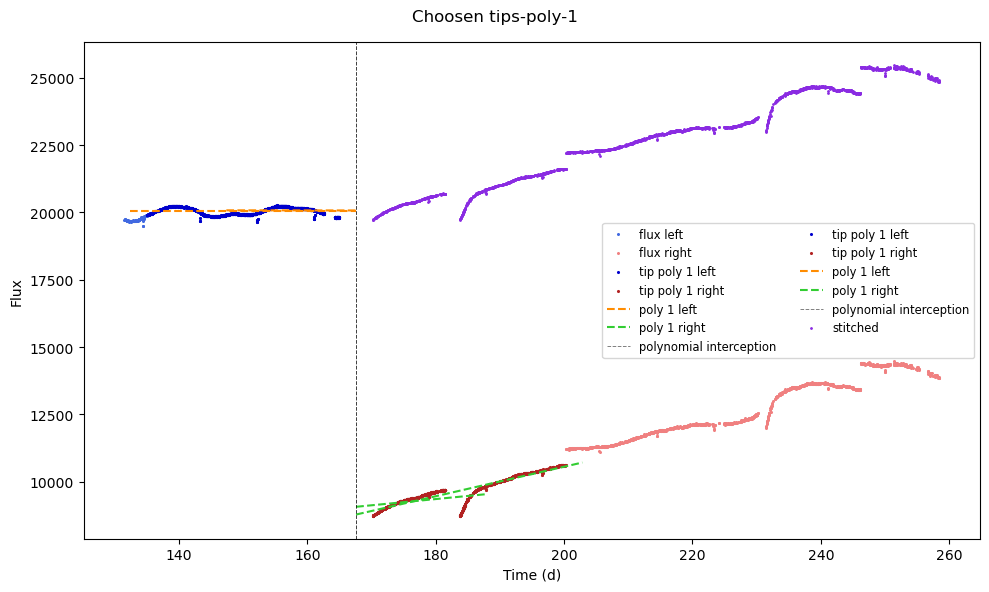

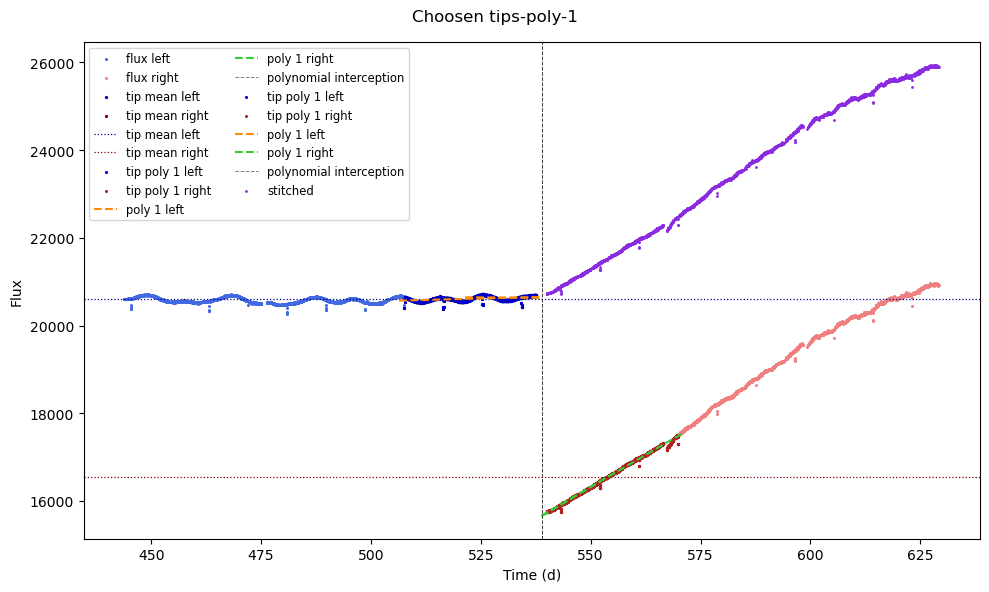

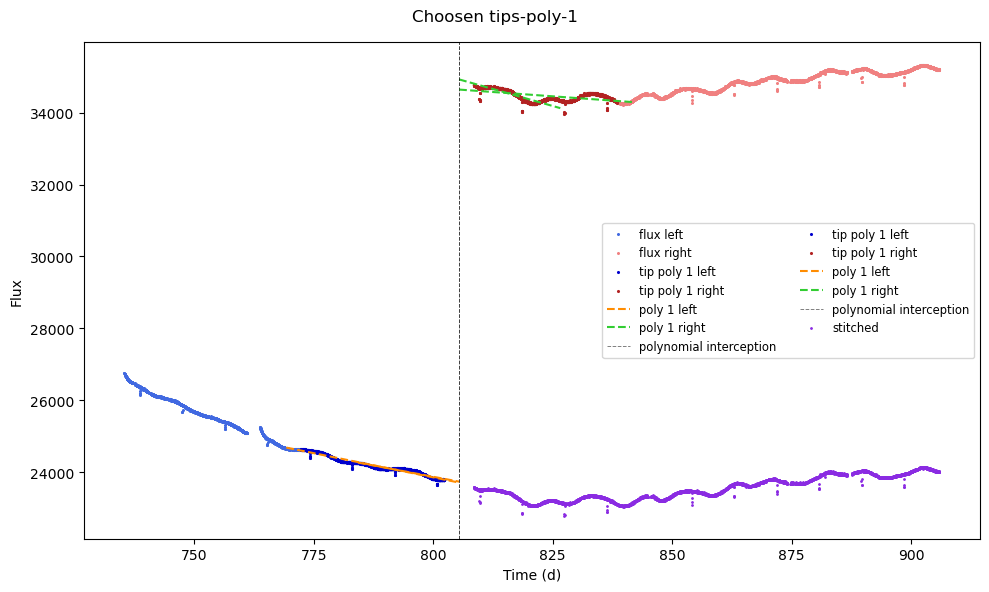

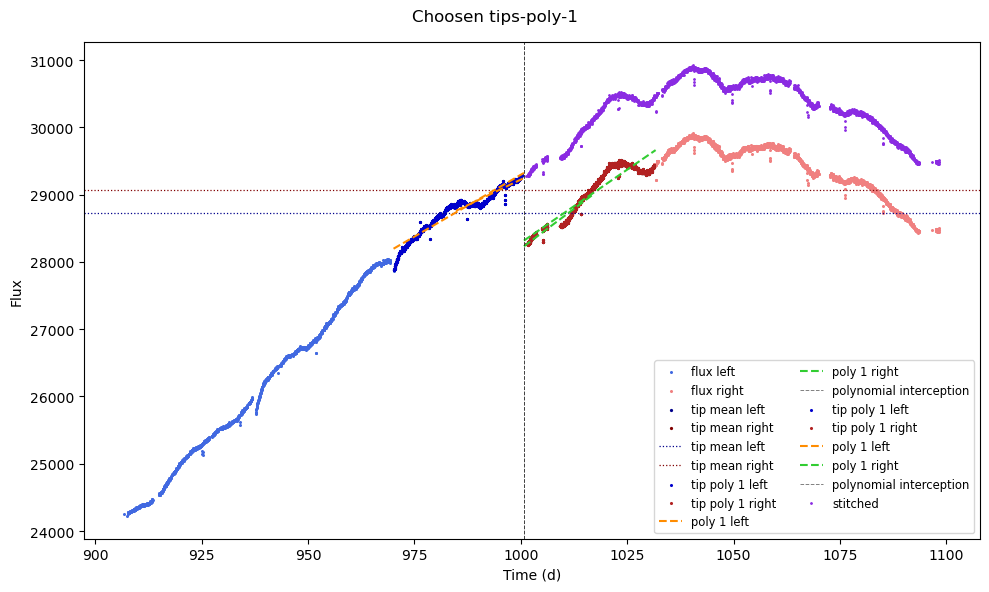

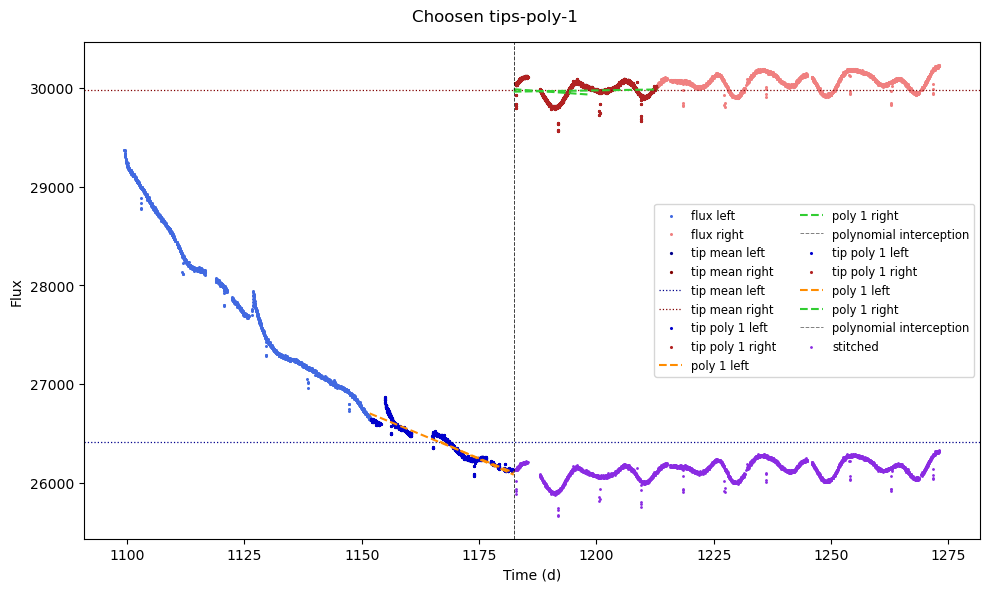

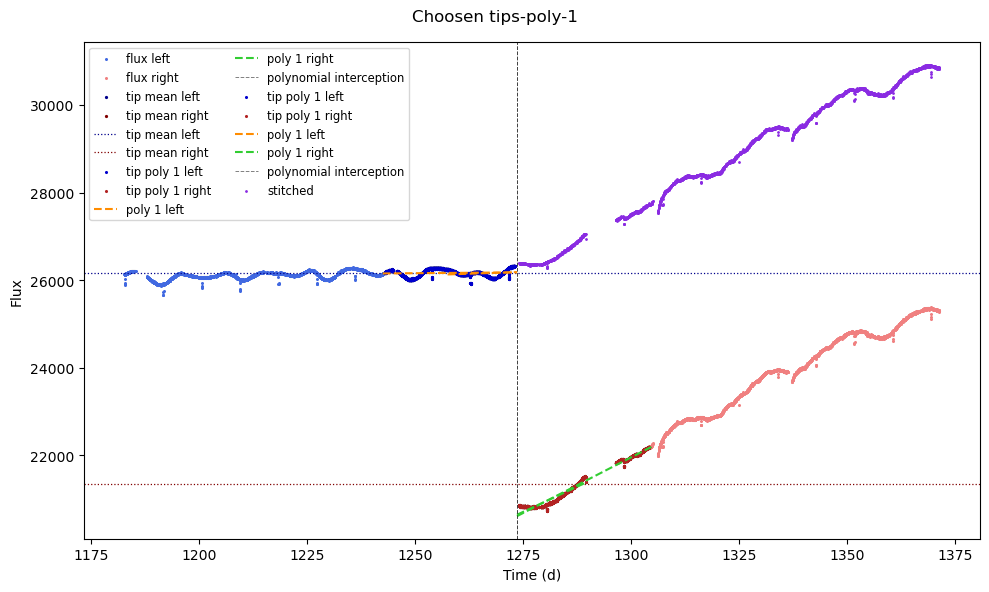

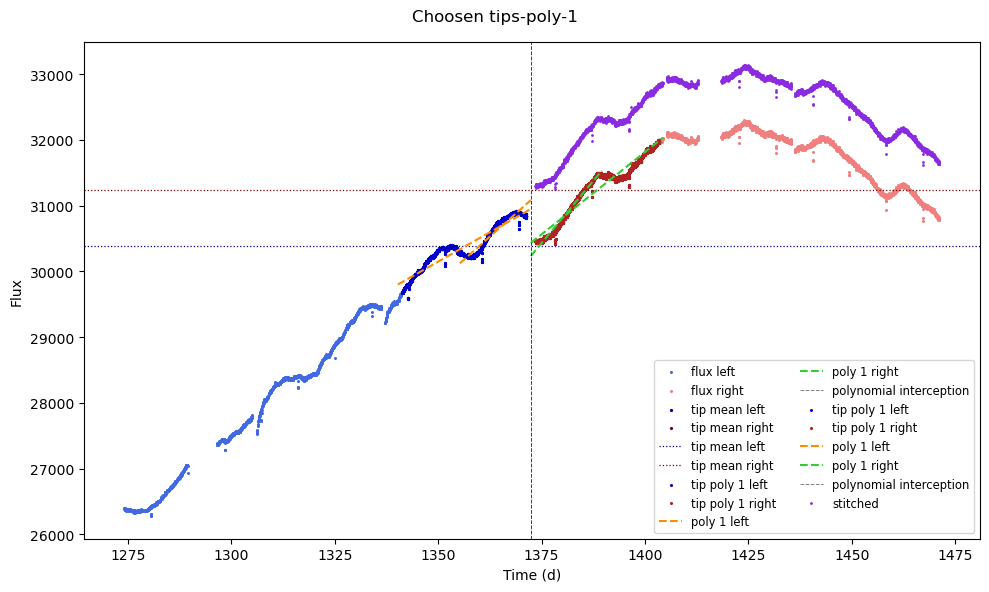

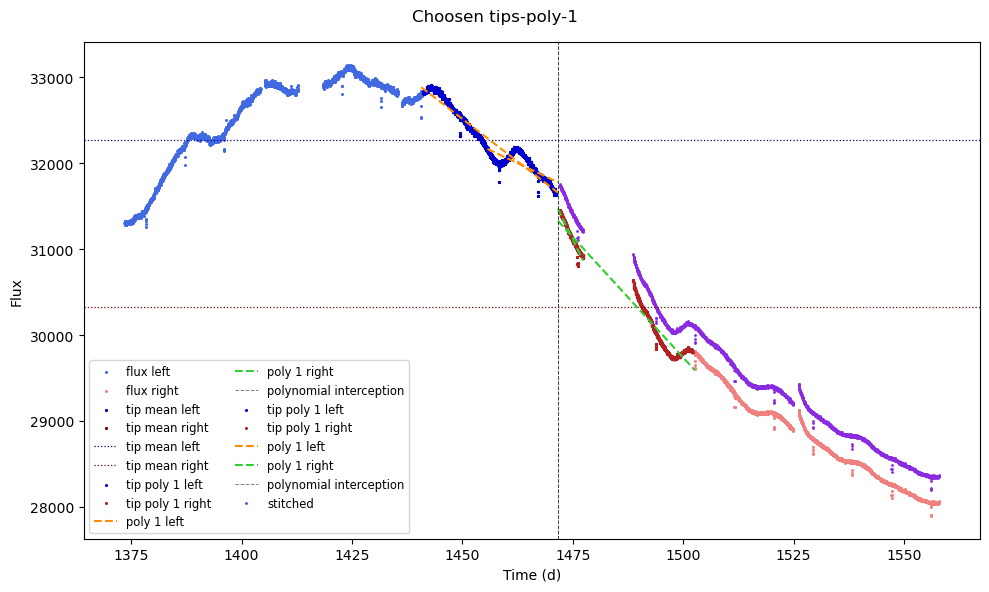

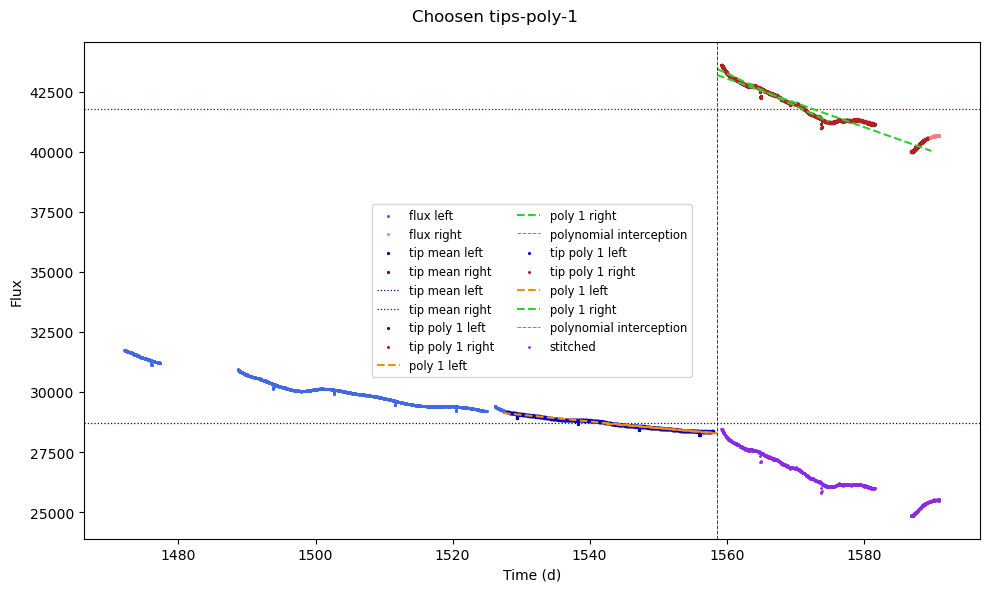

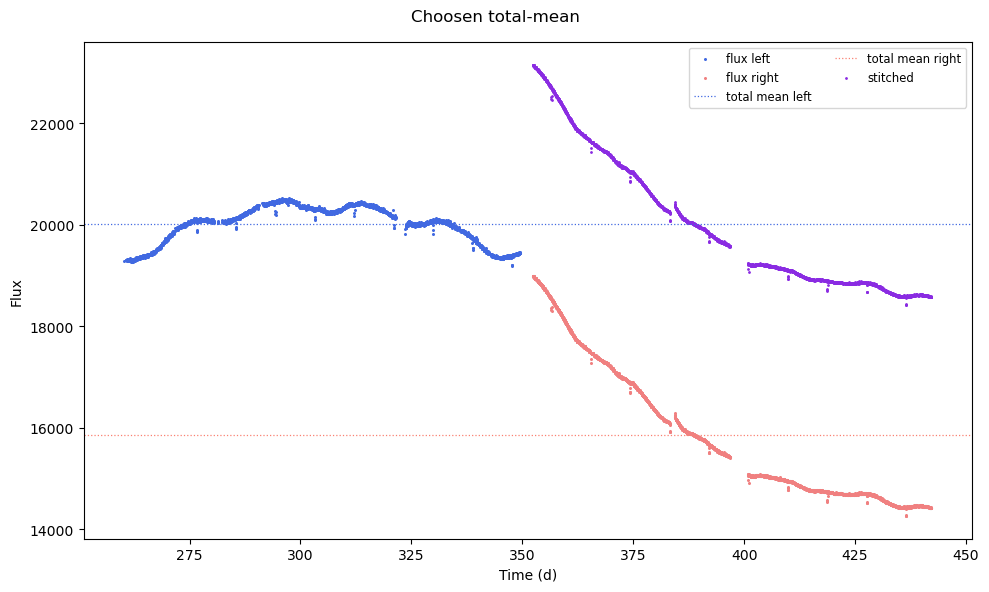

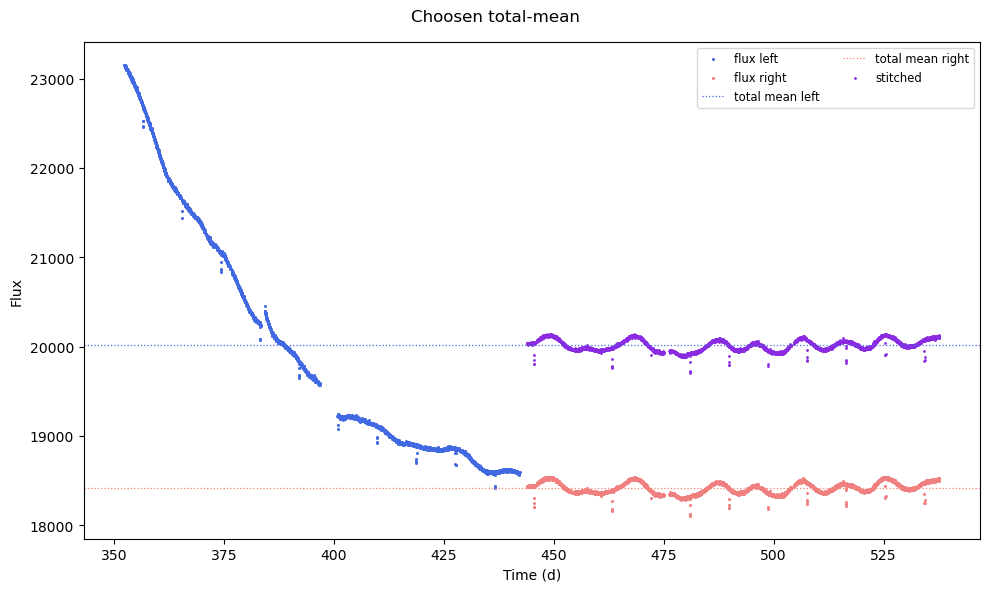

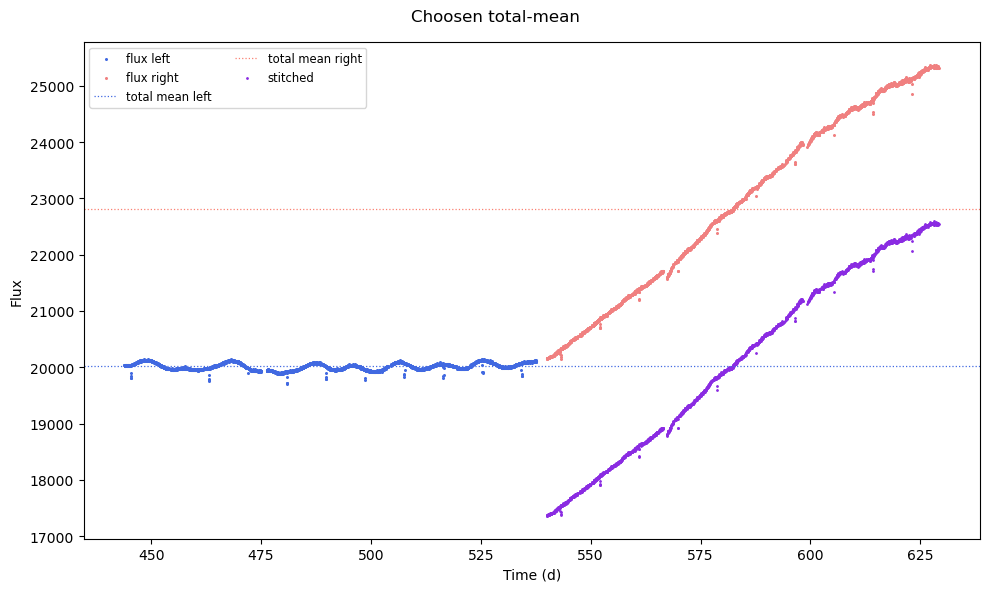

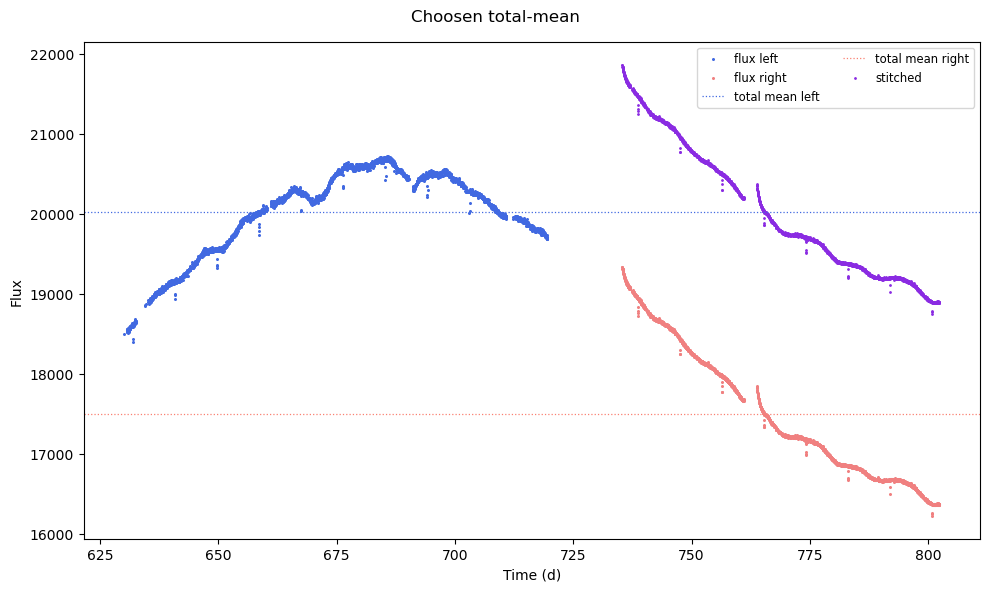

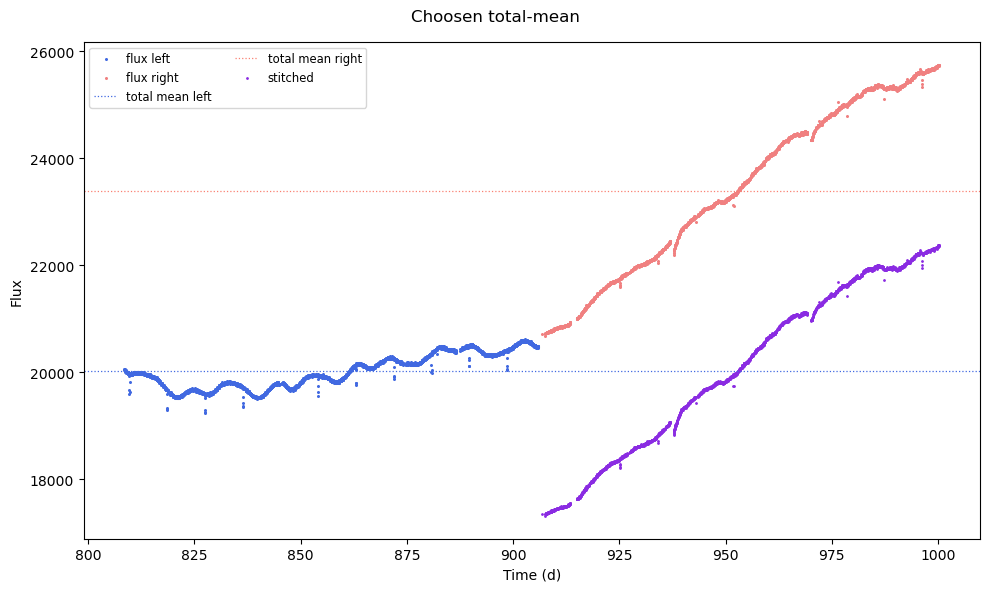

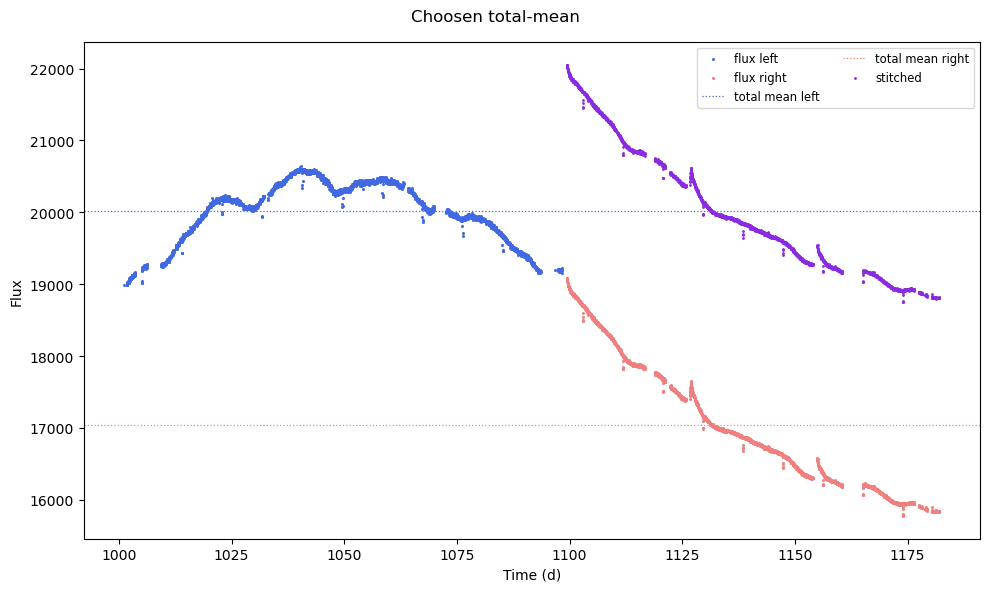

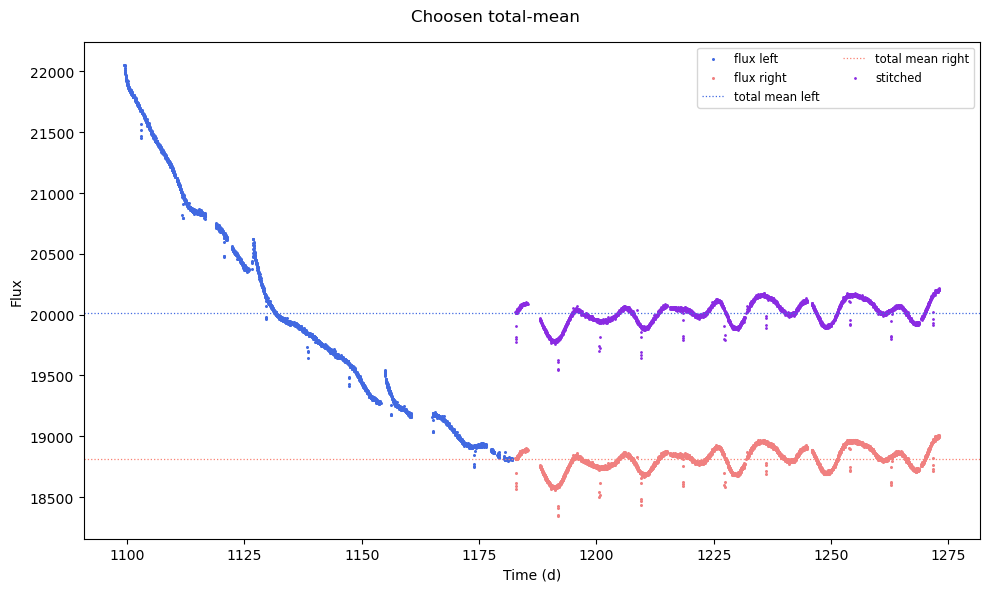

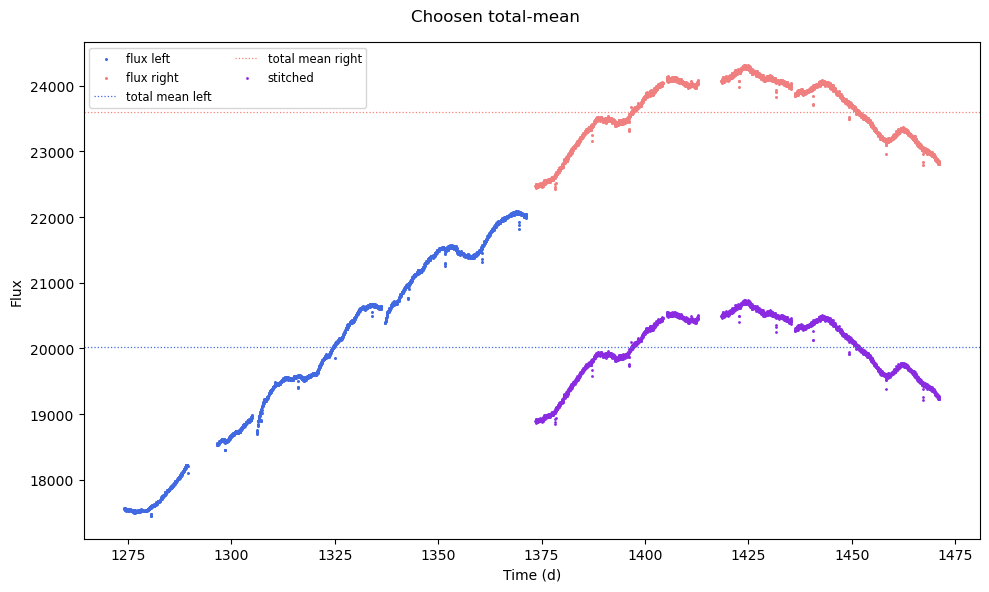

In [ ]:
lc = Lightcurve()
lc.load_kbonus(
    "../../kbonus/data/0007/000757450/hlsp_kbonus-bkg_kepler_kepler_kic-000757450_kepler_v1.0_lc.fits"
)

plt.close("all")
fig, (ax0, ax1) = plt.subplots(2, figsize=(10, 8), dpi=200)

lc.plot_flux(ax=ax0, title="Original flux")

lc.remove_quality()
lc.debug = True

lc.stitch(
    # This is a list of dictionnaries, each dictionnary being a method to stitch:
    # it is possible to use multiple times the same method with different options to compare them.
    # The options missing will be set according to the `available_methods` constant in `lobster/stitching.py`.
    stitching_mode=[
        {
            # the name of the method (total-mean, tips-mean, tips-poly-1, or tips-poly-2)
            "method": "total-mean",
            # the minimum number of days in the jump to use this method
            "min-jump": 10,
        },
        {
            "method": "tips-mean",
            # the maximum lenght of the tip
            "max-width": 30,
            # the maximum number of days in the jump to use this method
            "max-jump": 5,
            # the maximum "jump lenght / tip lenght" ratio before ditching the method
            "max-jump-multiplicator": 3,
        },
        {
            "method": "tips-poly-1",
            # the minimum number of days in the tip to use this method
            "min-width": 5,
            # the maximum lenght of the tip (may be smaller if the section is not long enought,
            # hence why there is a min-width option if we only want to use the method if enough data)
            "max-width": 15,
            # the maximum number of days in the jump to use this method
            "max-jump": 10,
        },
        {
            "method": "tips-poly-1",
            # the minimum number of days in the tip to use this method
            "min-width": 20,
            # the maximum lenght of the tip (may be smaller if the section is not long enought,
            # hence why there is a min-width option if we only want to use the method if enough data)
            "max-width": 30,
            # the maximum number of days in the jump to use this method
            "max-jump": 30,
        },
    ]
)

# please note that it is also possible to only give a string instead of all of this, in case
# you only want to test one stitching mode without caring about the rest:
lcp = lc.copy()
lcp.stitch(stitching_mode="total-mean")


lc.debug = False

lc.plot_flux(ax=ax1, title="Stitched flux")
lc.plot_jumps(ax1)

normalisation = lambda x: x  # x.normalize_sin4_filter(.5)
lc.remove_outliers("sigma_clipping", threshold=5, after_normalisation=normalisation)
lc.remove_outliers("deriv_sigma_clipping", threshold=5, after_normalisation=normalisation)

lc.resample()
lc.normalize_sin4_filter(55, divide=True)
lc.flux_to_ppm()

fig.suptitle(lc.object_name, fontsize=15)
fig.tight_layout()